[Lecture](https://youtu.be/2qOL45sp75c)


[View in Colaboratory](https://colab.research.google.com/github/schwaaweb/aimlds1_08-UnsupervisedLearning/blob/master/W08_CC--DJ--Coding_Challenge_Association_Models.ipynb)

**Coding Challenge**

In this coding challenge, you will apply the concepts of Association Rule Learning

1) Utilize the Apriori Algorithm to uncover frequent itemsets 

2) Discover the strongest association rules that have high lift and high confidence

3) Create a Directed Graph to surface the association rules identified in Step 2 above

**Resources**:

- The Wikipedia articles for [association rule learning](https://en.wikipedia.org/wiki/Association_rule_learning) and the [Apriori algorithm](https://en.wikipedia.org/wiki/Apriori_algorithm) provide a good introduction and overview of the topic.
- The `mlxtend` package provides an [implementation of Apriori](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/) ([source code](https://github.com/rasbt/mlxtend/blob/master/mlxtend/frequent_patterns/apriori.py)) - it is encouraged to read and understand the documentation and code, so you can be a savvy user of it.
- The `networkx` package has a [tutorial for drawing a directed graph](https://networkx.github.io/documentation/networkx-1.10/tutorial/index.html).


**Dataset: ** The data you will utilize is from the **UCI Machine Learning Repository** and represents transactional data from a UK retailer from 2010 through 2011. The data set represents sales to wholesalers so it is slightly different from data representing customer purchase patterns but is still a useful data set for the purposes of this exercise.

The data set can be downloaded from: http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx

**Guidance for coding challenge**:

1) Focus on the data for the following 2 countries: 1) **Germany** and 2) **Belgium**. Go through the 3 steps highlighted above for each of the 2 countries. This analysis will enable you to compare/constrast the sales of frequent itemsets in the "Germany" from that in "Belgium"

2) You will need to prepare the data. For example: some of the invoices contact 'C' in front of the invoice number; these ivoices should be removed from the dataset

3) Product descriptions with a value of 'POSTAGE' in it will need to be treated since it could negatively skew/impact the results

4) You will have to transpose the data set so that you get a proper representation of the underlying data set that can be feed into the Apriori Algorithm

*Hint:* Good Reference while exploring your data set - https://medium.com/@msalmon00/helpful-python-code-snippets-for-data-exploration-in-pandas-b7c5aed5ecb9

**Communicate your findings**:

One of the common tasks for Data Scientists in the real world is to communicate their findings. Summarize your analysis and make recomendations on how you could potentially improve/bolster sales for the Online Retailer

In [1]:
%%bash
conda install -c conda-forge mlxtend

Solving environment: ...working... done

## Package Plan ##

  environment location: /Users/darwinm/anaconda3

  added / updated specs: 
    - mlxtend


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    mlxtend-0.12.0             |           py36_0         1.2 MB  conda-forge
    conda-4.5.4                |           py36_0         622 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.8 MB

The following NEW packages will be INSTALLED:

    mlxtend: 0.12.0-py36_0 conda-forge

The following packages will be UPDATED:

    conda:   4.5.3-py36_0  conda-forge --> 4.5.4-py36_0 conda-forge

Proceed ([y]/n)? 

Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


mlxtend 0.12.0########## | 100% 
conda 4.5.4########## | 100% 


In [5]:
#!wget -c http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx
#!mv Online\ Retail.xlsx Online_Retail.xlsx
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import OnehotTransactions, TransactionEncoder



In [6]:
%%time
df = pd.read_excel('Online_Retail.xlsx')

CPU times: user 1min 25s, sys: 1.03 s, total: 1min 26s
Wall time: 1min 37s


In [7]:
df.shape

(541909, 8)

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      397924 non-null int64
StockCode      397924 non-null object
Description    397924 non-null object
Quantity       397924 non-null int64
InvoiceDate    397924 non-null datetime64[ns]
UnitPrice      397924 non-null float64
CustomerID     397924 non-null float64
Country        397924 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 27.3+ MB


In [57]:
df.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000,397924.000000
mean,560617.126645,13.021823,3.116174,15294.315171
std,13106.167695,180.420210,22.096788,1713.169877
min,536365.000000,1.000000,0.000000,12346.000000
25%,549234.000000,2.000000,1.250000,13969.000000
50%,561893.000000,6.000000,1.950000,15159.000000
75%,572090.000000,12.000000,3.750000,16795.000000
max,581587.000000,80995.000000,8142.750000,18287.000000


In [58]:
# Any nulls
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [22]:
# drop the nulls
df.dropna(subset=['Description','CustomerID'], how='any', inplace=True)

In [ ]:
#df.drop('POSTAGE', inplace=True, axis=1)

In [23]:
# nulls are gone
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [31]:
# How many contract invoices in the dataframe?
df['InvoiceNo'].str.startswith('c').count()

8905

In [33]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [35]:
# remove entries that start with 'c'
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.startswith('C')]
df['InvoiceNo'] = df['InvoiceNo'].astype('int')
print(df.dtypes)

InvoiceNo               int64
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


/Users/darwinm/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [36]:
df.shape

(397924, 8)

### German Analysis

In [38]:
transactions_per_row = df [df['Country']=='Germany'].pivot_table(index='InvoiceNo',columns='Description', values='Quantity',aggfunc='sum',fill_value=0)

In [39]:
transactions_per_row.head()

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# Now Drop 'POSTAGE'
transactions_per_row.drop('POSTAGE', inplace=True, axis=1)

In [44]:
%%time
purchase_sets = transactions_per_row.applymap(lambda quantity: 1 if quantity >= 1 else 0)


CPU times: user 735 ms, sys: 7.3 ms, total: 742 ms
Wall time: 819 ms


In [45]:
purchase_sets.head()

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
frequent_itemsets = apriori(purchase_sets, min_support=0.05, use_colnames=True)
association_rules(frequent_itemsets, metric='confidence', min_threshold=0.08)

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PLASTERS IN TIN CIRCUS PARADE ),(PLASTERS IN TIN WOODLAND ANIMALS),0.115974,0.137856,0.067834,0.584906,4.242887,0.051846,2.076984
1,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE ),0.137856,0.115974,0.067834,0.492063,4.242887,0.051846,1.740427
2,(ROUND SNACK BOXES SET OF 4 FRUITS ),(PLASTERS IN TIN CIRCUS PARADE ),0.157549,0.115974,0.050328,0.319444,2.754455,0.032057,1.298977
3,(PLASTERS IN TIN CIRCUS PARADE ),(ROUND SNACK BOXES SET OF 4 FRUITS ),0.115974,0.157549,0.050328,0.433962,2.754455,0.032057,1.488330
4,(PLASTERS IN TIN CIRCUS PARADE ),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.115974,0.245077,0.056893,0.490566,2.001685,0.028470,1.481887
5,(ROUND SNACK BOXES SET OF4 WOODLAND ),(PLASTERS IN TIN CIRCUS PARADE ),0.245077,0.115974,0.056893,0.232143,2.001685,0.028470,1.151290
6,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.137856,0.107221,0.061269,0.444444,4.145125,0.046488,1.607002
7,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.107221,0.137856,0.061269,0.571429,4.145125,0.046488,2.011670
8,(PLASTERS IN TIN WOODLAND ANIMALS),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.137856,0.245077,0.074398,0.539683,2.202098,0.040613,1.640006
9,(ROUND SNACK BOXES SET OF4 WOODLAND ),(PLASTERS IN TIN WOODLAND ANIMALS),0.245077,0.137856,0.074398,0.303571,2.202098,0.040613,1.237951


In [49]:
association_rules(frequent_itemsets, metric='lift', min_threshold=2)

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PLASTERS IN TIN CIRCUS PARADE ),(PLASTERS IN TIN WOODLAND ANIMALS),0.115974,0.137856,0.067834,0.584906,4.242887,0.051846,2.076984
1,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE ),0.137856,0.115974,0.067834,0.492063,4.242887,0.051846,1.740427
2,(ROUND SNACK BOXES SET OF 4 FRUITS ),(PLASTERS IN TIN CIRCUS PARADE ),0.157549,0.115974,0.050328,0.319444,2.754455,0.032057,1.298977
3,(PLASTERS IN TIN CIRCUS PARADE ),(ROUND SNACK BOXES SET OF 4 FRUITS ),0.115974,0.157549,0.050328,0.433962,2.754455,0.032057,1.488330
4,(PLASTERS IN TIN CIRCUS PARADE ),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.115974,0.245077,0.056893,0.490566,2.001685,0.028470,1.481887
5,(ROUND SNACK BOXES SET OF4 WOODLAND ),(PLASTERS IN TIN CIRCUS PARADE ),0.245077,0.115974,0.056893,0.232143,2.001685,0.028470,1.151290
6,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.137856,0.107221,0.061269,0.444444,4.145125,0.046488,1.607002
7,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.107221,0.137856,0.061269,0.571429,4.145125,0.046488,2.011670
8,(PLASTERS IN TIN WOODLAND ANIMALS),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.137856,0.245077,0.074398,0.539683,2.202098,0.040613,1.640006
9,(ROUND SNACK BOXES SET OF4 WOODLAND ),(PLASTERS IN TIN WOODLAND ANIMALS),0.245077,0.137856,0.074398,0.303571,2.202098,0.040613,1.237951


In [77]:
def trans_per_row(feature, value_of_feature,min_support,metric,min_threshold):
    transactions_per_row = df [
                                df[ feature ]== value_of_feature
                              ].pivot_table(
                                            index='InvoiceNo',
                                            columns='Description', 
                                            values='Quantity',
                                            aggfunc='sum',
                                            fill_value=0
                                            )
    transactions_per_row.drop('POSTAGE', inplace=True, axis=1)
    purchase_sets = transactions_per_row.applymap(lambda quantity: 1 if quantity >= 1 else 0)
    frequent_itemsets = apriori(purchase_sets, min_support=min_support, use_colnames=True)
    return association_rules(frequent_itemsets, metric=metric, min_threshold=min_threshold)
    

german_tpr = trans_per_row('Country','Germany',0.05,'confidence',0.08)
german_tpr




In [81]:
german_tpr = trans_per_row('Country','Germany',0.05,'confidence',0.08)
german_tpr

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PLASTERS IN TIN CIRCUS PARADE ),(PLASTERS IN TIN WOODLAND ANIMALS),0.115974,0.137856,0.067834,0.584906,4.242887,0.051846,2.076984
1,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE ),0.137856,0.115974,0.067834,0.492063,4.242887,0.051846,1.740427
2,(ROUND SNACK BOXES SET OF 4 FRUITS ),(PLASTERS IN TIN CIRCUS PARADE ),0.157549,0.115974,0.050328,0.319444,2.754455,0.032057,1.298977
3,(PLASTERS IN TIN CIRCUS PARADE ),(ROUND SNACK BOXES SET OF 4 FRUITS ),0.115974,0.157549,0.050328,0.433962,2.754455,0.032057,1.488330
4,(PLASTERS IN TIN CIRCUS PARADE ),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.115974,0.245077,0.056893,0.490566,2.001685,0.028470,1.481887
5,(ROUND SNACK BOXES SET OF4 WOODLAND ),(PLASTERS IN TIN CIRCUS PARADE ),0.245077,0.115974,0.056893,0.232143,2.001685,0.028470,1.151290
6,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.137856,0.107221,0.061269,0.444444,4.145125,0.046488,1.607002
7,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.107221,0.137856,0.061269,0.571429,4.145125,0.046488,2.011670
8,(PLASTERS IN TIN WOODLAND ANIMALS),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.137856,0.245077,0.074398,0.539683,2.202098,0.040613,1.640006
9,(ROUND SNACK BOXES SET OF4 WOODLAND ),(PLASTERS IN TIN WOODLAND ANIMALS),0.245077,0.137856,0.074398,0.303571,2.202098,0.040613,1.237951


In [83]:
german_tpr = trans_per_row('Country','Germany',0.05,'lift',4); german_tpr

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PLASTERS IN TIN CIRCUS PARADE ),(PLASTERS IN TIN WOODLAND ANIMALS),0.115974,0.137856,0.067834,0.584906,4.242887,0.051846,2.076984
1,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE ),0.137856,0.115974,0.067834,0.492063,4.242887,0.051846,1.740427
2,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.137856,0.107221,0.061269,0.444444,4.145125,0.046488,1.607002
3,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.107221,0.137856,0.061269,0.571429,4.145125,0.046488,2.011670
4,(WOODLAND CHARLOTTE BAG),(RED RETROSPOT CHARLOTTE BAG),0.126915,0.070022,0.059081,0.465517,6.648168,0.050194,1.739959
5,(RED RETROSPOT CHARLOTTE BAG),(WOODLAND CHARLOTTE BAG),0.070022,0.126915,0.059081,0.843750,6.648168,0.050194,5.587746


In [89]:
belgium_tpr = trans_per_row('Country','Belgium',0.05,'lift',18); belgium_tpr

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.05102,0.05102,0.05102,1.0,19.6,0.048417,inf
1,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.05102,0.05102,0.05102,1.0,19.6,0.048417,inf
2,"(SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...",(SET/6 RED SPOTTY PAPER CUPS),0.05102,0.05102,0.05102,1.0,19.6,0.048417,inf
3,"(SET/20 RED RETROSPOT PAPER NAPKINS , SET/6 RE...",(SET/6 RED SPOTTY PAPER PLATES),0.05102,0.05102,0.05102,1.0,19.6,0.048417,inf
4,(SET/6 RED SPOTTY PAPER PLATES),"(SET/20 RED RETROSPOT PAPER NAPKINS , SET/6 RE...",0.05102,0.05102,0.05102,1.0,19.6,0.048417,inf
5,(SET/6 RED SPOTTY PAPER CUPS),"(SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...",0.05102,0.05102,0.05102,1.0,19.6,0.048417,inf


In [79]:
belgium_tpr = trans_per_row('Country','Belgium',0.05,'confidence',0.08)

In [80]:
belgium_tpr

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(DOLLY GIRL BABY GIFT SET),( SPACEBOY BABY GIFT SET),0.071429,0.071429,0.061224,0.857143,12.000000,0.056122,6.500000
1,( SPACEBOY BABY GIFT SET),(DOLLY GIRL BABY GIFT SET),0.071429,0.071429,0.061224,0.857143,12.000000,0.056122,6.500000
2,(PACK OF 60 MUSHROOM CAKE CASES),(60 CAKE CASES DOLLY GIRL DESIGN),0.081633,0.091837,0.051020,0.625000,6.805556,0.043524,2.421769
3,(60 CAKE CASES DOLLY GIRL DESIGN),(PACK OF 60 MUSHROOM CAKE CASES),0.091837,0.081633,0.051020,0.555556,6.805556,0.043524,2.066327
4,(PACK OF 60 SPACEBOY CAKE CASES),(60 CAKE CASES DOLLY GIRL DESIGN),0.091837,0.091837,0.061224,0.666667,7.259259,0.052791,2.724490
5,(60 CAKE CASES DOLLY GIRL DESIGN),(PACK OF 60 SPACEBOY CAKE CASES),0.091837,0.091837,0.061224,0.666667,7.259259,0.052791,2.724490
6,(PACK OF 72 RETROSPOT CAKE CASES),(60 CAKE CASES DOLLY GIRL DESIGN),0.122449,0.091837,0.051020,0.416667,4.537037,0.039775,1.556851
7,(60 CAKE CASES DOLLY GIRL DESIGN),(PACK OF 72 RETROSPOT CAKE CASES),0.091837,0.122449,0.051020,0.555556,4.537037,0.039775,1.974490
8,(AIRLINE BAG VINTAGE JET SET RED),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.051020,0.387755,0.051020,1.000000,2.578947,0.031237,inf
9,(ROUND SNACK BOXES SET OF4 WOODLAND ),(AIRLINE BAG VINTAGE JET SET RED),0.387755,0.051020,0.051020,0.131579,2.578947,0.031237,1.092764


In [90]:
import networkx as netx
import matplotlib.pyplot as plt

def draw_association_graph(rules, rules_to_show):
  """Function to draw graph visualization association rules."""
  DiGraph = netx.DiGraph()
  
  colors = np.random.rand(rules_to_show)
  rule_nodes = set()
  
  for i in range(rules_to_show):
    rule_node = 'R' + str(i)
    DiGraph.add_nodes_from([rule_node])
    rule_nodes.add(rule_node)
    lift = rules.iloc[i]['lift']
    
    # For antecedant, the arrow originates from antecedant to the Rule node
    for antecedant in rules.iloc[i]['antecedants']:
      DiGraph.add_nodes_from([antecedant])
      DiGraph.add_edge(antecedant, rule_node, color=colors[i], weight=lift)
    
    # For consequent, the arrow originates fromt he Rule node to the consequent
    for consequent in rules.iloc[i]['consequents']:
      DiGraph.add_edge(rule_node, consequent, color=colors[i], weight=lift)
  
  # Set the color of rule nodes to orange, non-rule nodes to green
  node_colors = ['orange' if node in rule_nodes else 'green'
                 for node in DiGraph]
  
  # Print/draw results!
  edges = DiGraph.edges()
  nodes = DiGraph.nodes()
  print('Nodes: ' + str(nodes))
  print('Edges: ' + str(edges))
  
  edge_colors = [DiGraph[src][dest]['color'] for src, dest in edges]
  edge_weights =  [DiGraph[src][dest]['weight'] for src, dest in edges]
  
  positions = netx.spring_layout(DiGraph, k=15, scale=1)
  print("Node positions: " + str(positions))
  netx.draw_networkx(DiGraph, positions, edges=edges, node_color=node_colors,
                    edge_color=edge_colors, width=edge_weights, font_size=16,
                    with_labels=False)
  
  # Add labels under nodes
  for position in positions:
    positions[position][1] -= 0.15
  netx.draw_networkx_labels(DiGraph, positions)
  plt.show()

In [94]:
def analyze_country(country, min_support=0.10, lift_threshold=4):
  """Run associaton rule analysis for a given country."""
  transactions_per_row = df[df['Country'] == country].pivot_table(
      index='InvoiceNo', columns='Description', values='Quantity',
      aggfunc='sum', fill_value=0)
  # Let's get rid of postage, it's not really a product
  transactions_per_row.drop('POSTAGE', inplace=True, axis=1)
  # Last bit of cleaning - we only care if a transaction includes an item or not
  purchase_sets = transactions_per_row.applymap(
      lambda quantity: 1 if quantity >= 1 else 0)
  # Time for Apriori!
  # Calculate support (indication of how frequently itemset appears in data)
  # and confidence (indication of how often a rule is true)
  frequent_itemsets = apriori(purchase_sets, min_support=min_support,
                              use_colnames=True)
  associationrules = association_rules(frequent_itemsets, metric='lift',
                                       min_threshold=lift_threshold)
  draw_association_graph(associationrules, associationrules.shape[0])



Nodes: ['R0', 'ALARM CLOCK BAKELIKE RED ', 'ALARM CLOCK BAKELIKE GREEN', 'R1', 'R2', 'ALARM CLOCK BAKELIKE PINK', 'R3', 'R4', 'LUNCH BAG RED RETROSPOT', 'LUNCH BAG WOODLAND', 'R5', 'R6', 'WOODLAND CHARLOTTE BAG', 'RED RETROSPOT CHARLOTTE BAG', 'R7']
Edges: [('R0', 'ALARM CLOCK BAKELIKE GREEN'), ('ALARM CLOCK BAKELIKE RED ', 'R0'), ('ALARM CLOCK BAKELIKE RED ', 'R3'), ('ALARM CLOCK BAKELIKE GREEN', 'R1'), ('R1', 'ALARM CLOCK BAKELIKE RED '), ('R2', 'ALARM CLOCK BAKELIKE RED '), ('ALARM CLOCK BAKELIKE PINK', 'R2'), ('R3', 'ALARM CLOCK BAKELIKE PINK'), ('R4', 'LUNCH BAG WOODLAND'), ('LUNCH BAG RED RETROSPOT', 'R4'), ('LUNCH BAG WOODLAND', 'R5'), ('R5', 'LUNCH BAG RED RETROSPOT'), ('R6', 'RED RETROSPOT CHARLOTTE BAG'), ('WOODLAND CHARLOTTE BAG', 'R6'), ('RED RETROSPOT CHARLOTTE BAG', 'R7'), ('R7', 'WOODLAND CHARLOTTE BAG')]
Node positions: {'R0': array([0.41638934, 0.85630309]), 'ALARM CLOCK BAKELIKE RED ': array([0.01996442, 0.98230258]), 'ALARM CLOCK BAKELIKE GREEN': array([ 0.52517901, 

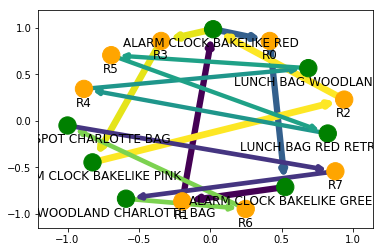

In [95]:
analyze_country('Belgium', min_support=0.08)

Nodes: ['R0', 'PLASTERS IN TIN CIRCUS PARADE ', 'PLASTERS IN TIN WOODLAND ANIMALS', 'R1', 'R2', 'PLASTERS IN TIN SPACEBOY', 'R3', 'R4', 'WOODLAND CHARLOTTE BAG', 'RED RETROSPOT CHARLOTTE BAG', 'R5']
Edges: [('R0', 'PLASTERS IN TIN WOODLAND ANIMALS'), ('PLASTERS IN TIN CIRCUS PARADE ', 'R0'), ('PLASTERS IN TIN WOODLAND ANIMALS', 'R1'), ('PLASTERS IN TIN WOODLAND ANIMALS', 'R2'), ('R1', 'PLASTERS IN TIN CIRCUS PARADE '), ('R2', 'PLASTERS IN TIN SPACEBOY'), ('PLASTERS IN TIN SPACEBOY', 'R3'), ('R3', 'PLASTERS IN TIN WOODLAND ANIMALS'), ('R4', 'RED RETROSPOT CHARLOTTE BAG'), ('WOODLAND CHARLOTTE BAG', 'R4'), ('RED RETROSPOT CHARLOTTE BAG', 'R5'), ('R5', 'WOODLAND CHARLOTTE BAG')]
Node positions: {'R0': array([0.38758911, 0.80332233]), 'PLASTERS IN TIN CIRCUS PARADE ': array([-0.19161347,  0.87362228]), 'PLASTERS IN TIN WOODLAND ANIMALS': array([-0.56248623,  0.5863676 ]), 'R1': array([0.64222548, 0.44376139]), 'R2': array([-0.9174569 ,  0.31530066]), 'PLASTERS IN TIN SPACEBOY': array([-0.0

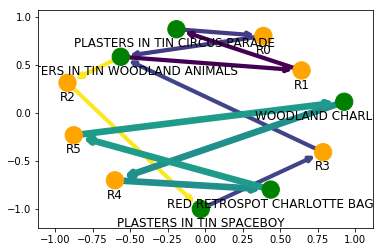

In [93]:
analyze_country('Germany', min_support=0.05)

In [85]:
!git status && git add . && git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   W08_CC--DJ--Coding_Challenge_Association_Models.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
On branch master
Your branch is up to date with 'origin/master'.

Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	modified:   W08_CC--DJ--Coding_Challenge_Association_Models.ipynb



In [86]:
!git commit -am "integrated the functions from the lecture, so I have the Germany and Belgium graphed, now I need to try to make sense of the relationships and tweak the thresholds as well as the ?attributes? I manipulate"

[master 5c7b518] made a function that you can plug country and a couple of other charcteristics into, not sure what the output means yet
 1 file changed, 2650 insertions(+), 53 deletions(-)


In [87]:
!git status && git push && git status && date

On branch master
Your branch is ahead of 'origin/master' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean
Counting objects: 3, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 17.93 KiB | 1.79 MiB/s, done.
Total 3 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To github.com:schwaaweb/aimlds1_08-UnsupervisedLearning.git
   a2f25f7..5c7b518  master -> master
On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean
Wed May 23 17:14:00 EDT 2018
